In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

In [3]:
from tensorflow.keras.datasets import mnist

In [4]:
(x_train,y_train),(x_test,y_test)=mnist.load_data()

### 2.欣賞數據集內容

In [5]:
len(x_train)

60000

In [6]:
len(x_test)

10000

In [7]:
n=9487

In [8]:
x_train[n]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 240,
        253, 165,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 241,
        252, 252,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

In [9]:
y_train[n]

1

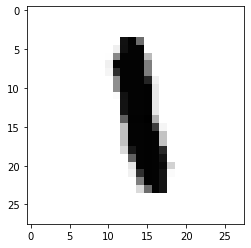

In [11]:
plt.imshow(x_train[n],cmap='Greys')

正確答案: 2


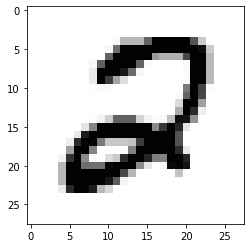

In [13]:
n=3627
plt.imshow(x_train[n],cmap='Greys')
print('正確答案:',y_train[n])

### 3.資料整理

In [14]:
np.array([3,78,95,99])/100

array([0.03, 0.78, 0.95, 0.99])

In [15]:
x_train=x_train/100
x_test=x_test/100

In [16]:
x_train.shape

(60000, 28, 28)

In [18]:
x_train=x_train.reshape(60000,784)

In [20]:
x_test=x_test.reshape(10000,784)

In [22]:
from tensorflow.keras.utils import to_categorical

In [23]:
y_train=to_categorical(y_train,10)

In [24]:
y_test=to_categorical(y_test,10)

In [25]:
y_train[9487]

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [26]:
x_train=x_train*100/255
x_teat=x_test*100/255

### 打造神經網路

In [29]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD

In [30]:
model=Sequential()

In [32]:
model.add(Dense(87,input_dim=784,activation='relu'))

In [34]:
model.add(Dense(87,activation='relu'))

In [35]:
model.add(Dense(10,activation='softmax'))

### 4.組裝我們的神經網路

In [36]:
model.compile(loss='mse',optimizer=SGD(lr=0.087),metrics=['accuracy'])

In [37]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 87)                68295     
_________________________________________________________________
dense_1 (Dense)              (None, 87)                7656      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                880       
Total params: 76,831
Trainable params: 76,831
Non-trainable params: 0
_________________________________________________________________


In [39]:
784*87+87

68295

### 5.訓練

In [41]:
model.fit(x_train,y_train,batch_size=100,epochs=20)

Train on 60000 samples
Epoch 1/20
60000/60000 [==============================] - 8s 131us/sample - loss: 0.0828 - accuracy: 0.3310
Epoch 2/20
60000/60000 [==============================] - 3s 49us/sample - loss: 0.0530 - accuracy: 0.6643
Epoch 3/20
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0310 - accuracy: 0.8271
Epoch 4/20
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0225 - accuracy: 0.8675
Epoch 5/20
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0190 - accuracy: 0.8832
Epoch 6/20
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0172 - accuracy: 0.8934
Epoch 7/20
60000/60000 [==============================] - 3s 43us/sample - loss: 0.0160 - accuracy: 0.9002
Epoch 8/20
60000/60000 [==============================] - 2s 41us/sample - loss: 0.0151 - accuracy: 0.9042
Epoch 9/20
60000/60000 [==============================] - 3s 44us/sample - loss: 0.0144 - accuracy: 0.9081
Epoch 10/20
6

### 6.訓練成果

In [43]:
result=model.predict_classes(x_test)

In [1]:
n=9487
print('神經網路預測是:',result[n])
plt.imshow(x_test[n].reshape(28,28),cmap='Greys')

NameError: name 'result' is not defined

In [46]:
def show_predict(n):
    print('神經網路說是:',result[n])
    plt.imshow(x_test[n].reshape(28,28),cmap='Greys')
    

神經網路說是: 6


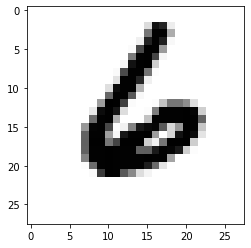

In [47]:
show_predict(8888)